## Steps to solve an ODE with solve_ ivp:

dy/dt = f(t, y)
y0 = y_0

(1) Import solve ivp from the scipy, integrate module
(2) Define the function, f, for the right-hand side of the ODE
    -- Make sure ODE is in standard form
    -- Function arguments: f(t, y, [parameters))
    -- def simple_function(t, y):
    --         return -y # y' = -e^(-t) = -y
(3) Create an array of the initial and final time: t_span = [a = t_begins, b = t_ends]
    -- a = -5
    -- b = 6
    -- t = np.array([a, b])
    -- The solver will choose its own internal time points!
(4)
(4a) Define an array with the value of the initial condition: y_0 = [value]
    -- y0 = np.array([np.exp(5)])
    -- It has to be an array!
(4b) Define an array with the values to be evaluated, adjust step size for a smooth drawing, np.arange returns a numpy array
    -- t_eval = np.arange(a, b, 0.1)

(5) Find the solution using solve ivp
    -- solution = solve_ivp(function name, t_span, y_0)

  Returns a dictionary object with:
      -- t: time points
      -- y: array of the values of the solution at t
      other values: (see documentation)

  link to more info about odeint:
  https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html

See also: https://www.youtube.com/watch?v=Gg--FOdupwY

# Task 1.0

In [1]:
# (1) Import solve ivp from the scipy, integrate module
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# (3) Create an array of the initial and final time: t_span = [a = t_begins, b = t_ends]
a = -5
b = 6
t = np.array([a, b])

# (4a) Define an array with the value of the initial condition: y_0 = [value]
y0 = np.array([np.exp(5)])
# (4b) Define an array with the values to be evaluated, adjust step size for a smooth drawing, np.arange returns a numpy array
t_eval = np.arange(a, b, 0.1)

In [3]:
# (2) Define the function, f, for the right-hand side of the ODE
def simple_function(t, y):
    return -y # y' = -e^(-t) = -y

# (5a) Find the solution using solve ivp without certain values
# solution = solve_ivp(simple_function, t , y0)

# (5b) Find the solution using solve ivp with certain values
solution = solve_ivp(simple_function, t , y0, t_eval = t_eval)

In [4]:
# (5c) Get results
#print(f't: {solution.t}')

In [5]:
# (5c) Get results
#print(f'y: {solution.y}')

In [6]:
# The exact solution
t_exact = t_eval
y_exact = np.array([np.exp(-t_eval)])
# print(f't_exact:\n {t_exact}')
# print(f'y_exact:\n {y_exact}')

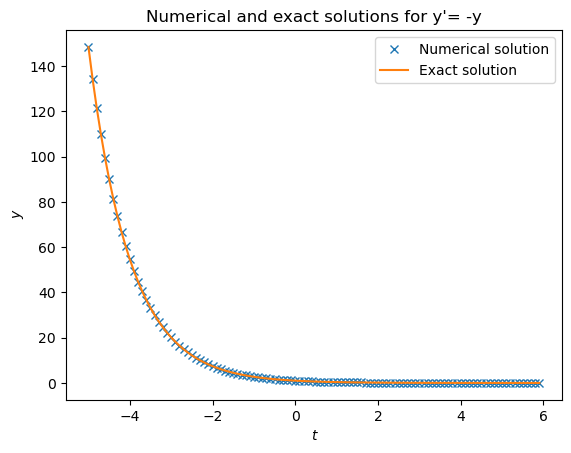

In [8]:
# Plot the answer
plt.plot(solution.t, solution.y[0], 'x')
plt.plot(t_exact, y_exact[0], '-')
plt.xlabel('t', style='italic')
plt.ylabel('y', style='italic')
plt.legend(['Numerical solution', 'Exact solution'])
plt.title("Numerical and exact solutions for y'= -y")
plt.show()

# Task 1.1, 1.2, 1.3

In [9]:
# (1) Import solve ivp from the scipy, integrate module
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
import numpy as np

In [10]:
# (3) Create an array of the initial and final time: t_span = [t_begins, t_ends]
t = np.arange(1800, 2205, 5) # Returns an numpy array

# (4a) Define an array with the value of the initial condition: y_0 = [value]
y0 = np.array([3.018])



In [11]:
# (2) Define the function, f, for the right-hand side of the ODE

# Manual entries
data_t = np.array([1800, 1850, 1900, 1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015])

data_p = np.array([1, 1.262, 1.650, 2.525, 2.758, 3.018, 3.322, 3.682, 4.061, 4.440, 4.853, 5.310, 5.735, 6.127, 6.520, 6.930, 7.349])

# Exponential function without ode
t_exp = np.arange(1800,2200,5)  # Returns a numpy array, is needed for the exponential function = t

def y(t):
    t0 = 1960
    b_minus_m = 0.02
    return y0 * np.exp(b_minus_m * (t - t0))

# Exponential ode
t = np.array([1960,2200])
y0 = np.array([3.018])
t_eval = np. arange(1960, 2200, 1) # Returns a numpy array

def exponential_ode(t, y0):
    t0 = 1960
    b_minus_m = 0.02
    return b_minus_m * y0

# Logistic ode
t = np.array([1960,2200])
y0 = np.array([3.018])
t_eval = np.arange(1960, 2200, 1) # Returns a numpy array

def logistic_ode(t,y):
    g = 0.029
    p = 2.941e-3
    return (g-p*y)*y

# (5a) Find the solution using solve ivp without certain values
# Exponential ode
solution_exponential_ode = solve_ivp(exponential_ode, t , y0, t_eval = t_eval)

# Logistic ode
solution_logistic_ode = solve_ivp(logistic_ode, t, y0, t_eval = t_eval)

# (5b) Find the solution using solve ivp with certain values
# solution = solve_ivp(simple_function, t , y0, t_eval = t_eval)

In [12]:
# (5c) Print results
# print(f'solution_exponential_ode: t:\n {solution_exponetial_ode.t}')
# print(f'solution_logistic_ode: t:\n {solution_logistic_ode.t}')

In [13]:
# (5c) Print results
# print(f'solution_exponential_ode: y:\n {solution_exponetial_ode.y[0]}')
# print(f'solution_logistic_ode: y:\n {solution_logistic_ode.y[0]}')

In [14]:
# The exact solution -> There is no exact solution
"""
t_exact = t
y_exact = ??????
print(y_exact)
"""

'\nt_exact = t\ny_exact = ??????\nprint(y_exact)\n'

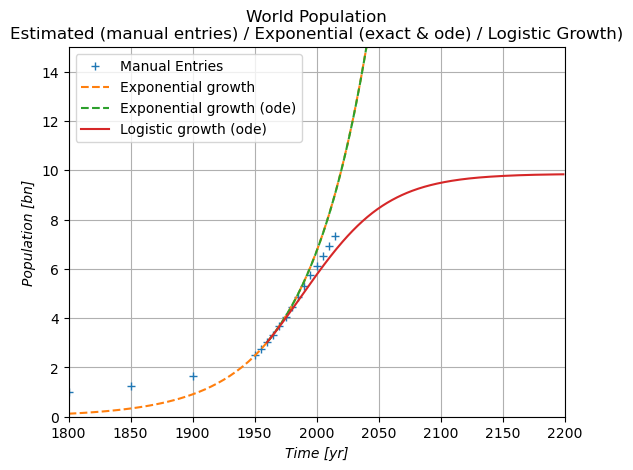

In [15]:
# Plot the answer
plt.xlabel('Time [yr]', style='italic')
plt.ylabel('Population [bn]', style='italic')

# Manual entries
plt.plot(data_t, data_p, '+')

# Exponential function
plt.plot(t_exp, y(t_exp), '--')

# Exponential ode
plt.plot(solution_exponential_ode.t, solution_exponential_ode.y[0], '--')

# Logistic ode
plt.plot(solution_logistic_ode.t, solution_logistic_ode.y[0],'-')

plt.title('World Population\nEstimated (manual entries) / Exponential (exact & ode) / Logistic Growth)')
plt.xlim([1800, 2200])
plt.ylim([0, 15])
plt.grid()
plt.legend(['Manual Entries', 'Exponential growth', 'Exponential growth (ode)', 'Logistic growth (ode)'])
plt.show()

# Task 1.4

In [415]:
# (1) Import solve ivp from the scipy, integrate module
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
import numpy as np

In [416]:
# (3) Create an array of the initial and final time: t_span = [t_begins, t_ends]
t = np.arange(1960, 2122, 1) # Returns an numpy array

# (4a) Define an array with the value of the initial condition: y_0 = [value]
y0 = np.array([3.018])
# (4b) Define an array with the values to be evaluated
t_eval = np.arange(1960, 2122, 1) # Returns a numpy array

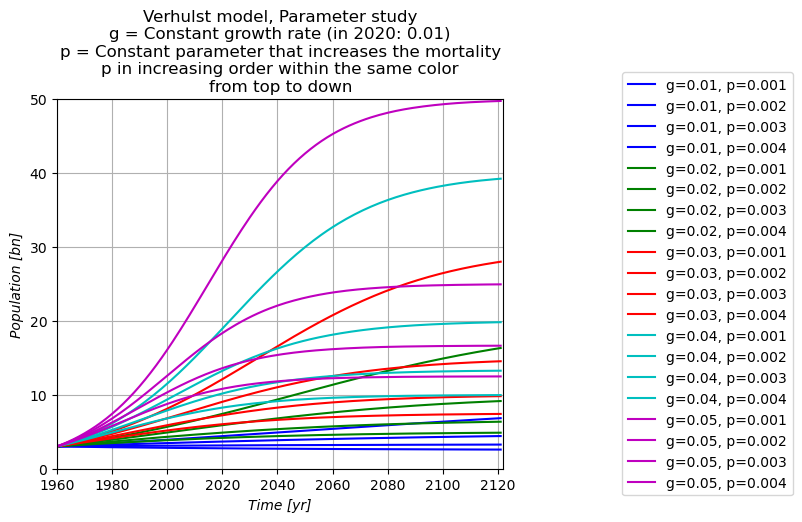

In [17]:
# (2) Define the function, f, for the right-hand side of the ODE
# Logistic ode
t = np.array([1960,2200])
y0 = np.array([3.018])
g = np.arange(0.01, 0.06, 0.01)
p = np.arange(0.001, 0.006, 0.001)


def logistic_ode(t, y, g , p):
    return (g-p*y)*y

# (5a) Find the solution using solve ivp without certain values
# solution_logistic_ode = solve_ivp(logistic_ode, t, y0)

# (5b) Find the solution using solve ivp with certain values and plot it.
for g in np.arange(0.01, 0.06, 0.01):
    for p in np.arange(0.001, 0.005, 0.001):
        res = solve_ivp(logistic_ode, y0=(3.018,), t_span=(1960,2122), t_eval=np.arange(1960,2122,1), args=(g, p))
        if g == 0.01:
            plt.plot(res.t, res.y[0], 'b', label=f'g={g}, p={p}')
        elif g == 0.02:
            plt.plot(res.t, res.y[0], 'g', label=f'g={g}, p={p}')
        elif g == 0.03:
            plt.plot(res.t, res.y[0], 'r', label=f'g={g}, p={p}')
        elif g == 0.04:
            plt.plot(res.t, res.y[0], 'c', label=f'g={g}, p={p}')
        elif g == 0.05:
            plt.plot(res.t, res.y[0], 'm', label=f'g={g}, p={p}')
        else:
            plt.plot(res.t, res.y[0], 'm', label=f'g={g}, p={p}')
plt.xlim([1960, 2122])
plt.ylim([0, 50])
plt.xlabel('Time [yr]', style='italic')
plt.ylabel('Population [bn]', style='italic')
plt.title('Verhulst model, Parameter study\ng = Constant growth rate (in 2020: 0.01)\np = Constant parameter that increases the mortality\np in increasing order within the same color\nfrom top to down')
plt.grid()

ax = plt.subplot(111)
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))




# Task 1.5

In [19]:
# (1) Import solve ivp from the scipy, integrate module
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
import numpy as np

In [20]:
y0 = np.array([50, 30])
a = 0
b = 40
t = np.array([a, b])
t_eval = np.arange(a, b, 0.001)


In [21]:
def lotkavolterra(t, y0):
    g1 =  0.5   # 1/yr
    g2 =  0.8   # 1/yr
    g3 =  0.008 # 1/yr
    # Here are two ODS to solve.
    return [g1 * y0[0] - g3 * y0[0] * y0[1], -g2 * y0[1] + g3 * y0[0] * y0[1]]

solution = solve_ivp(lotkavolterra, t, y0, t_eval = t_eval )

In [29]:
# (5c) Get results
t = solution.t
# print(f't: {t}')

In [27]:
# (5c) Get results
y = solution.y
# print(f'y: {y}')

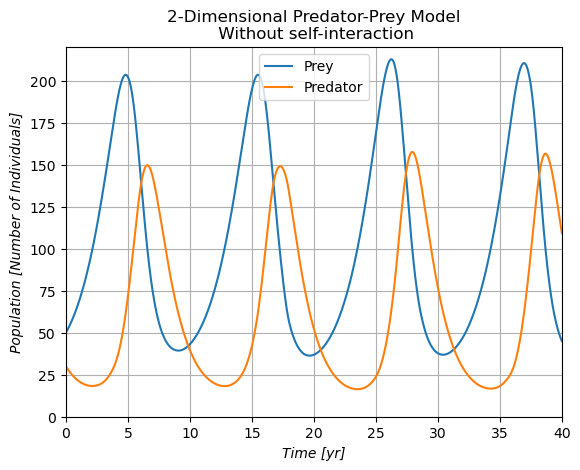

In [24]:
# Plot the answer
plt.plot(t, y[0])
plt.plot(t, y[1])
plt.xlim([0, 40])
plt.ylim([0, 220])
plt.grid()
plt.legend(['Prey', 'Predator'])
plt.xlabel('Time [yr]', style='italic')
plt.ylabel('Population [Number of Individuals]', style='italic')
plt.title('2-Dimensional Predator-Prey Model\n Without self-interaction')
plt.show()

Text(0.5, 1.0, 'Phase Space\n2-Dimensional Predator-Prey Model\n Without self-interaction')

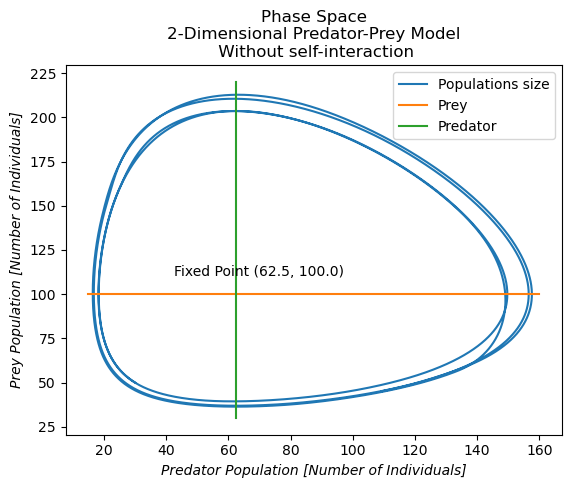

In [25]:
# Plot phase space
g1 = 0.5
g2 = 0.8
g3 = 0.008
Y1 = g2/g3
Y2 = g1/g3
plt.plot(solution.y[1],solution.y[0],[15,160],[Y1,Y1],[Y2,Y2],[30,220])
plt.legend(['Populations size', 'Prey', 'Predator'], loc='upper right')
plt.text(Y2-20,Y1+10, f'Fixed Point {Y2, Y1}')
plt.title ('Phase Space')
plt.xlabel('Predator Population [Number of Individuals]', style='italic')
plt.ylabel('Prey Population [Number of Individuals]', style='italic')
plt.title('Phase Space\n2-Dimensional Predator-Prey Model\n Without self-interaction')

# Findings
-- Preys' and predators' population size do not reach a stable state i.e. there are constantly changing population sizes' amplitudes.

# Task 1.6

In [425]:
# (1) Import solve ivp from the scipy, integrate module
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
import numpy as np

In [426]:
y0 = np.array([50, 30])
a = 0
b = 200
t = np.array([a, b])
t_eval = np.arange(a, b, 0.001)

In [427]:
def lotkavolterra(t, y0):
    g1 =  0.5   # 1/yr
    g2 =  0.8   # 1/yr
    g3 =  0.008 # 1/yr
    g4 =  0.0005 # 1/yr
    return [g1 * y0[0] - g3 * y0[0] * y0[1] - g4 * y0[0] * y0[0] , -g2 * y0[1] + g3 * y0[0] * y0[1]]

solution = solve_ivp(lotkavolterra, t, y0, t_eval = t_eval)

In [428]:
# (5c) Get results
t = solution.t
# print(f't: {t}')

In [429]:
# (5c) Get results
y = solution.y
# print(f'y: {y}')

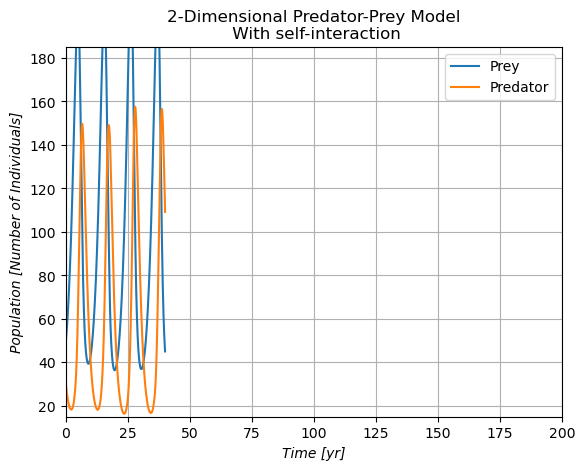

In [31]:
# Plot the answer
plt.plot(t, y[0])
plt.plot(t, y[1])
plt.xlim([0, 200])
plt.ylim([15, 185])
plt.grid()
plt.legend(['Prey', 'Predator'])
plt.xlabel('Time [yr]', style='italic')
plt.ylabel('Population [Number of Individuals]', style='italic')
plt.title('2-Dimensional Predator-Prey Model\n With self-interaction')
plt.show()

Text(0.5, 1.0, 'Phase Space\n2-Dimensional Predator-Prey Model\n With self-interaction')

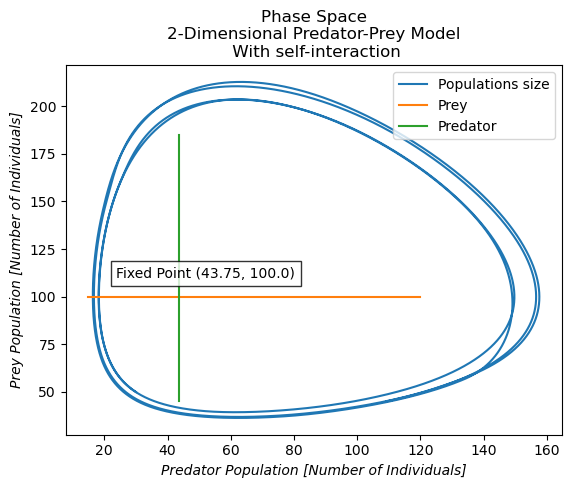

In [32]:
# Plot phase space
g1 =  0.5   # 1/yr
g2 =  0.8   # 1/yr
g3 =  0.008 # 1/yr
g4 =  0.0005 # 1/yr
Y1 = g2/g3
Y2 = g1 * Y1  - g4 * Y1 ** 2 / g2 # Y1 went into dy1/dt = g1y1 - g3y1y2 - g4y1y1, this was solved for y2
plt.plot(solution.y[1],solution.y[0],[15,120],[Y1,Y1],[Y2,Y2],[45,185])
plt.legend(['Populations size', 'Prey', 'Predator'], loc='upper right')
plt.text(Y2-20,Y1+10, f'Fixed Point {Y2, Y1}', bbox=dict(facecolor='white', alpha=0.8))
plt.title('Phase Space')
plt.xlabel('Predator Population [Number of Individuals]', style='italic')
plt.ylabel('Prey Population [Number of Individuals]', style='italic')
plt.title('Phase Space\n2-Dimensional Predator-Prey Model\n With self-interaction')

# Difference between Task 1.5 and Task 1.6
- In task 1.6, the amplitudes of the periodical fluctuations of the population sizes decrease for pray and predator over time constantly.
- Looking at the phase space plot, the population size fluctuation, its amplitude, for preys and predators decrease over time to a smaller range but still prevail (prey around 100 individuals, predators around 43.75).
- Moreover, the mean values are smaller for both populations with self-interaction than for the model without self-interaction.
- In task 1.5 the amplitudes of the periodical fluctuation stay approximately the same over time.

# Task 1.7

In [33]:
# Not solvable

# Task 1.8

# Not yet finished, Can you help me please?
## I have three question marked inside the code and in general is it correct so far?

In [34]:
# (1) Import solve ivp from the scipy, integrate module
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [35]:
# (3) Create an array of the initial and final time: t_span = [a = t_begins, b = t_ends]
a = 0                # Seconds
b = 365.25 * 24 * 60 # Seconds
t = np.array([a, b])

# (4a) Define an array with the value of the initial condition: y_0 = [value]
x   = 150e9         # [m], x-coord. of Earth, i.e. distance Sun-Earth in meters
x_d = 0             # [km/s], x'-coord. of Earth, i.e. velocity of Earth towards the Sun
y   = 0             # [m], y-coord. of Earth
y_d = 3e4           # [km/s], y'-coord. of Earth, i.e. velocity of Earth around the Sun
z   = 0             # [m], z-coord. of Earth
z_d = 0             # [km/s], z'-coord. of Earth, i.e. velocity of Earth out of the plane
state = [x, x_d, y, y_d, z, z_d]
# (4b) Define an array with the values to be evaluated
t_eval = np.arange(a, b, 24 * 60 * 60)

In [36]:
# (2) Define the function, f, for the right-hand side of the ODE
def earth_sun(state, t):
    G   = 6.67430e-11   # Gravitational constant, m^3 / (kg * s^2)
    M   = 1.9889e30     # Sun's mass, kg
    x = state[0] # u1
    y = state[2] # u3
    z = state[4] # u5
    x_d = state[1] # u2, u1'
    y_d = state[3] # u4, u3'
    z_d = state[5] # u6, u5'
    x_dd = -G * M * x / (x ** 2 + y ** 2 + z ** 2) ** (3 / 2) # x'', u2'
    y_dd = -G * M * y / (x ** 2 + y ** 2 + z ** 2) ** (3 / 2) # y'', u4'
    z_dd = -G * M * z / (x ** 2 + y ** 2 + z ** 2) ** (3 / 2) # z'', u6'
    dstate_dt = [x_d, y_d, z_d, x_dd, y_dd, z_dd]
    return dstate_dt


# (5a) Find the solution using solve_ivp without certain values
# solution = solve_ivp(simple_function, t , y0)

# (5b) Find the solution using solve_ivp with certain values
# solution = solve_ivp(simple_function, t , y0, t_eval = t_eval)
solution = odeint(earth_sun, state, t)

x_coord = solution[ : , 0]  # x-coord [km] of earth over time interval
y_coord = solution[ : , 1]  # y-coord [km] of earth over time interval
z_coord = solution[ : , 2]  # z-coord [km] of earth over time interval

# *************** FRAGE: Warum gibt es hier einen Fehler?
# *************** ????? TypeError: 'float' object is not subscriptable for solve_ivp
# solution2 = solve_ivp(earth_sun, t, state)

# x_coord = solution2.y[0, : ]  # x-coord [km] of earth over time interval
# y_coord = solution2.y[1, : ]  # y-coord [km] of earth over time interval
# z_coord = solution2.y[2, : ]  # z-coord [km] of earth over time interval



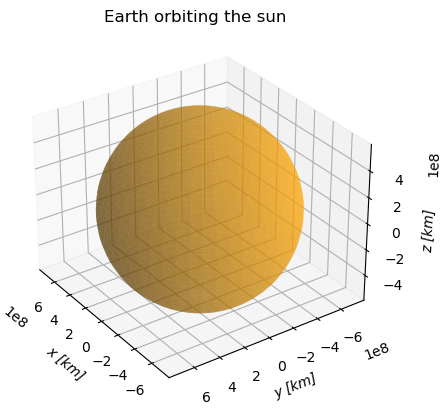

In [37]:
# Setting up Spherical Sun to Plot
N = 50
phi = np.linspace(0, 2 * np.pi, N)
theta = np.linspace(0, np.pi, N)
theta, phi = np.meshgrid(theta, phi)

r_Sun = 696340e3  # Average radius of Sun [km]
x_Sun = r_Sun * np.cos(phi) * np.sin(theta)
y_Sun = r_Sun * np.sin(phi) * np.sin(theta)
z_Sun = r_Sun * np.cos(theta)

# Plotting Sun and Earth Orbit
# *************** FRAGE: Warum kann ich den Erdorbit nicht plotten?
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x_Sun, y_Sun, z_Sun, color='orange', alpha=0.5)
# Erdorbit
# ax.plot3D(x_coord, y_coord, z_coord, 'blue')
ax.view_init(30, 145)  # Changing viewing angle
plt.title('Earth orbiting the sun')
ax.set_xlabel('x [km]', style='italic' )
ax.set_ylabel('y [km]', style='italic')
ax.set_zlabel('z [km]', style='italic')

# Make axes limits
xyzlim = np.array([ax.get_xlim3d(), ax.get_ylim3d(),
                   ax.get_zlim3d()]).T
XYZlim = np.asarray([min(xyzlim[0]), max(xyzlim[1])])
ax.set_xlim3d(XYZlim)
ax.set_ylim3d(XYZlim)
ax.set_zlim3d(XYZlim * 3/4)
plt.show()

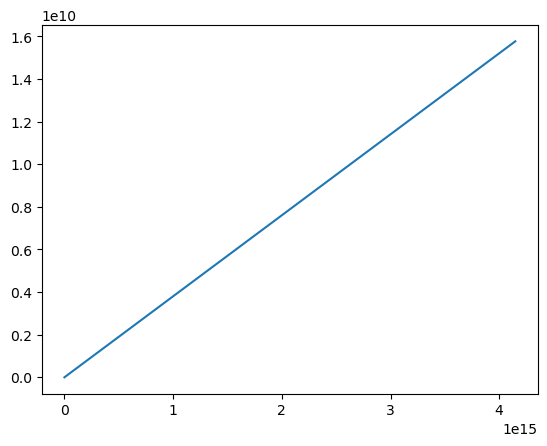

In [38]:
# *********** Frage ist die Aufgabe auf der Folie 89 so gedacht?
plt.plot(x_coord, y_coord)
plt.show()

# What happens?
## I presume that when I am decreasing the vertical speed (y-axis), earth will revolve nearer to the sun.
## I presume when I am increasing the time periode nothing will happen.

# Parallel Computing Using Python
# Mit numpy ohne explizieter aber implizieter Parallelisierung

In [39]:
import time
import numpy as np
n = 500
a = np.zeros(n)
tic=time.perf_counter()
for i in np. arange (n) :
    test = np.random.rand(n,n)
    w,v = np.linalg.eig(test)
    a[i]=np.max(np.abs(w))
toc=time.perf_counter()
print (f"Computing time: {toc-tic:0.4f} seconds")

# Computing time: 71.5413 seconds

Computing time: 84.4183 seconds


# Parallel Computing Using Python
# Ohne numpy ohne Parallelisierung

In [40]:
import time
n=20000
def processInput(i): return i**i
inputs = range(n)
# Sequential
tic=time.perf_counter()
results_seq = [processInput(i) for i in inputs]
toc=time.perf_counter()
print(f"Computing time using sequential computing:{toc-tic:0.4f} seconds")

# Computing time using sequential computing:33.3612 seconds

Computing time using sequential computing:37.2899 seconds


# Parallel Computing Using Python
# Ohne numpy mit Parallelisierung

In [41]:
import time
import multiprocessing as mp
from joblib import Parallel, delayed
n=20000
def processInput(i): return i**i
inputs = range(n)
# Parallel
num_cores = mp.cpu_count()
print('Number of processors: ', num_cores)
tic=time.perf_counter()
results_par = Parallel(n_jobs=num_cores)(delayed(processInput)(i) for i in inputs)
toc=time.perf_counter()
print(f"Computing time using parallel computing: {toc-tic:0.4f}seconds")

# Number of processors:  16
# Computing time using parallel computing: 6.9736seconds

Number of processors:  16
Computing time using parallel computing: 11.3509seconds
